#**Initialization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
url = 'https://raw.githubusercontent.com/hasobi/skripsi/master/dataset/KDDTrain%2B_v1.csv'

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# df = pd.read_csv('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/dataset/KDDTrain+_v1.csv')

df = pd.read_csv(url)

In [5]:
data = df

In [6]:
# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

data.replace(attack_dict, inplace = True)

In [7]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


# Define Data

In [8]:
data1 = data.loc[data['type_attack'].isin(['normal','dos'])]

In [9]:
data1.drop('num_packet', axis=1, inplace=True)

C:\Users\sobi\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
data1.drop('type_attack', axis=1, inplace=True)

In [11]:
protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}

flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}

data1.replace(flag_dict, inplace = True)
data1.replace(service_dict, inplace = True)
data1.replace(protocol_dict, inplace = True)


C:\Users\sobi\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


# PCA 41 column  cara lama

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
# data_src_bytes4 = data_src_bytes3[['normal','dos']]

# Standardizing the features
x = data1.values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=41)
principalComponents = pca.fit_transform(x)

# principalDf = pd.DataFrame(data = principalComponents)

principalDf = pd.DataFrame(data = principalComponents, columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'])
# finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDF = principalDf

# finalDF.reset_index(level=0, inplace=True)
finalDF


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.572030,-0.113497,0.746554,-4.599044,-3.244708,-1.821022,-0.136741,-0.380010,1.291472,0.316671,...,-0.963147,0.722360,-0.006047,0.034227,-0.017748,0.042224,-0.018583,0.054031,-0.001606,-2.025396e-17
1,3.816695,-1.187686,-0.017001,0.596179,-0.071809,-0.208397,-0.091884,-0.023221,-0.002556,0.025236,...,-0.199279,0.154129,-0.038288,-0.016944,0.002379,0.001301,0.000755,0.004520,0.000848,-4.228949e-17
2,-2.627736,-0.588114,-0.146299,1.130697,0.096293,-0.276581,0.355233,-0.010468,-0.047542,-0.043964,...,-0.091170,-0.104928,0.052555,0.268434,-0.083797,-0.238098,-0.081580,0.025233,0.000425,-1.074602e-16
3,-2.408812,-0.591713,-0.251949,0.355271,0.661953,0.272510,-0.783401,0.097655,-0.204831,-0.258324,...,0.085304,0.065232,-0.015227,0.010703,0.008145,0.022565,-0.004970,-0.002273,0.001975,-1.472210e-16
4,2.144669,7.056901,-0.009669,0.002356,0.017880,0.173285,-0.796322,0.155840,-0.039598,-0.156570,...,-0.231718,0.117152,0.005072,0.041924,-0.002188,0.045803,0.018157,0.003892,0.000045,9.246184e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113264,3.865583,-1.191075,-0.042497,0.322046,0.167070,-0.041572,0.061032,-0.005641,-0.047674,0.013842,...,0.032640,-0.023388,0.008188,-0.015628,0.011346,-0.004801,0.002108,-0.001575,0.001031,7.793886e-19
113265,-1.688780,-0.458238,-0.097977,-0.731804,0.159732,-0.270448,-2.055399,0.039122,0.189605,0.575613,...,0.158109,-0.133378,0.029733,-0.037550,-0.002595,-0.047375,-0.003050,-0.009855,0.003209,5.707925e-19
113266,-0.375499,-0.663823,0.153631,0.355446,-0.881606,-0.429550,-0.811276,0.099759,0.033982,-0.187322,...,0.135953,-0.357977,0.148998,-0.878233,-0.861352,0.114385,-0.048985,0.138741,0.003102,1.190215e-18
113267,3.756811,-1.188278,-0.092241,0.432825,0.211388,0.097048,0.092474,-0.018064,-0.046976,0.041462,...,-0.162041,0.108997,-0.032067,0.000454,0.005022,0.007590,0.000365,0.004398,-0.000673,5.881840e-19


# PCA 5 terbaik dengan cara beda
[towards datascience](https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe)

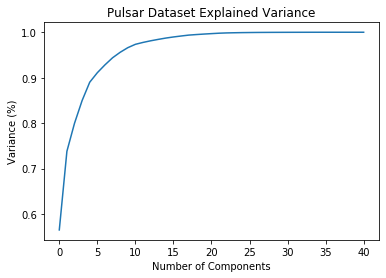

In [14]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data1.iloc[:,:])

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [15]:
pca = PCA(n_components=5)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4
0,0.188473,0.444017,0.647420,1.096441,0.016607
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235172
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176


In [16]:
# '''HOW IT WORKS?'''

In [17]:
# data_mean = np.mean(data_rescaled)

In [18]:
# data_center = data_rescaled - data_mean

# data_center

In [19]:
'''
cov_matrix = np.cov(data_center)

eigenval, eigenvec = np.linalg.eig(cov_matrix)

significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(significance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

'''

"\ncov_matrix = np.cov(data_center)\n\neigenval, eigenvec = np.linalg.eig(cov_matrix)\n\nsignificance = [np.abs(i)/np.sum(eigenval) for i in eigenval]\n#Plotting the Cumulative Summation of the Explained Variance\nplt.figure()\nplt.plot(np.cumsum(significance))\nplt.xlabel('Number of Components')\nplt.ylabel('Variance (%)') #for each component\nplt.title('Pulsar Dataset Explained Variance')\nplt.show()\n\n"

# PCA 10 paling dominan


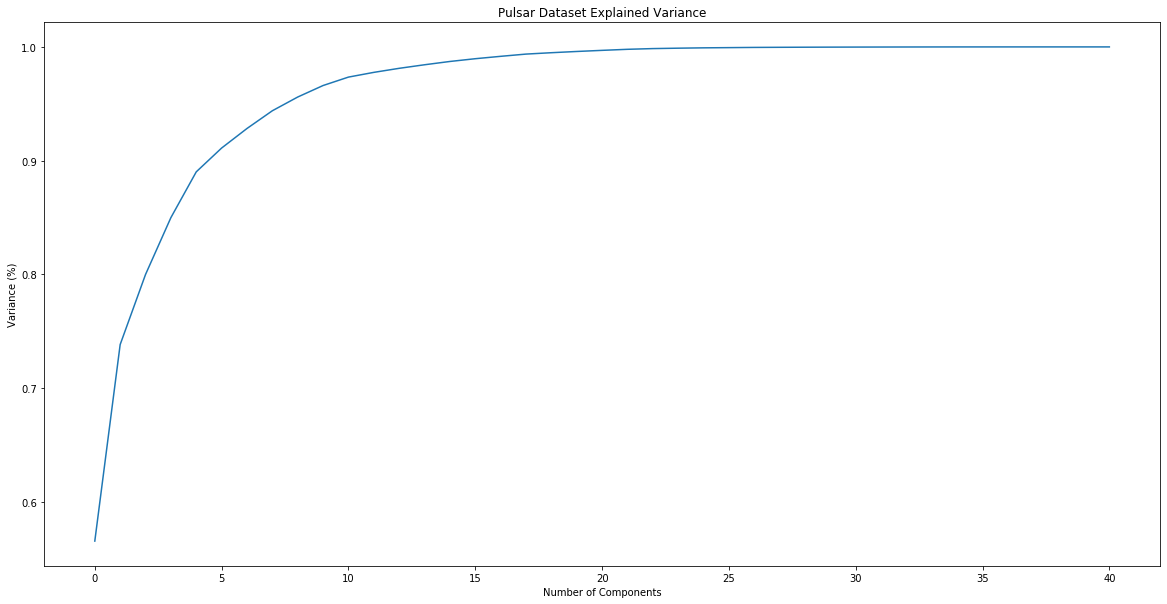

In [20]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data1.iloc[:,:])

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance

plt.figure(figsize=(20,10)) 

# plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [21]:
pca = PCA(n_components=10)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.188473,0.444017,0.647420,1.096441,0.016609,0.109830,0.043724,-0.268808,-0.352872,0.717292
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046,0.086759,0.059993,-0.108642,-0.037669,0.019043
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235172,-0.093546,-0.120637,-0.124779,0.085580,0.030092
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711,-0.065730,0.048992,0.006543,-0.101855,-0.023445
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176,0.024948,0.052186,-0.109201,-0.002122,-0.004508


# PCA 20 paling dominan

In [22]:
pca = PCA(n_components=20)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19
0,0.188473,0.444017,0.647420,1.096441,0.016608,0.109829,0.043725,-0.268810,-0.352869,0.717304,-0.228226,0.090865,-0.148836,-0.143329,0.048137,0.150255,0.056156,0.109531,-0.036056,0.157321
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046,0.086759,0.059994,-0.108643,-0.037668,0.019047,0.045946,-0.009891,-0.028268,-0.009508,0.023706,-0.004859,0.010683,-0.014633,-0.025800,0.045801
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235172,-0.093547,-0.120637,-0.124779,0.085581,0.030095,-0.006218,0.093513,0.021702,0.040413,0.018772,0.086065,-0.101129,-0.025409,0.015466,0.014262
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711,-0.065730,0.048992,0.006543,-0.101855,-0.023447,-0.005122,-0.033677,-0.001548,0.015780,-0.013601,0.014743,0.002431,0.020913,0.006496,-0.004352
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176,0.024948,0.052187,-0.109202,-0.002120,-0.004501,0.008668,0.004576,-0.016279,-0.017508,0.011451,0.008284,-0.007846,-0.037247,-0.031509,0.058863


# PCA 41 atau semua atribut

In [23]:
pca = PCA(n_components=41)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,...,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40
0,0.188473,0.444017,0.647420,1.096441,0.016608,0.109829,0.043725,-0.268810,-0.352869,0.717304,...,-0.001390,0.001989,-0.001017,0.001911,0.000013,-0.000492,-0.000350,-0.000197,-5.412495e-06,-8.504976e-18
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046,0.086759,0.059994,-0.108643,-0.037668,0.019047,...,0.000182,0.000088,0.000074,-0.000025,-0.000013,-0.000006,0.000082,0.000004,2.883116e-06,-1.775807e-17
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235172,-0.093547,-0.120637,-0.124779,0.085581,0.030095,...,0.000117,-0.000200,-0.000115,0.000689,-0.000071,0.000037,-0.000261,0.000065,1.239931e-06,-4.512433e-17
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711,-0.065730,0.048992,0.006543,-0.101855,-0.023447,...,-0.000083,0.000604,-0.000665,-0.000583,0.000113,-0.000051,0.000109,-0.000030,6.752815e-06,-6.182058e-17
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176,0.024948,0.052187,-0.109202,-0.002120,-0.004501,...,-0.000285,-0.000126,-0.000100,0.000030,0.000005,-0.000033,-0.000096,-0.000014,2.253994e-07,3.882628e-18


# PCA 15 komponen

In [24]:
pca = PCA(n_components=15)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.shape

(113269, 15)

# PCA 41 cara baru

In [25]:
pca = PCA(n_components=41)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.shape

(113269, 41)